# Support Vector Machine

In [3]:
# file path exist
import os.path
from os import path

# translator
import googletrans
from googletrans import Translator

# pandas
import pandas as pd

# preprocessing of text
import re
import string


# word tokenizer by nltk
from nltk import word_tokenize

# lemmatizer
from nltk.stem import WordNetLemmatizer

# stopwords (Remove buzz words)
from nltk.corpus import stopwords

# split data into train and test
from sklearn.model_selection import train_test_split

# bag of words
from sklearn.feature_extraction.text import CountVectorizer

# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

# RFM classifier from scikit learn
from sklearn.svm import LinearSVC

# Tf-idf feature extraction 
from sklearn.feature_extraction.text import TfidfVectorizer

# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# cross validation for kfold
from sklearn.model_selection import cross_val_score

# calc accuracy
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [5]:

# original hindi file
filename  = 'Eng-Hin-data/english-anot-shuffled'
orig_df = pd.read_csv(filename + '.csv',  
               delimiter=',')
orig_df.columns = ['Text', 'Label']

In [6]:
orig_df.head()

,Text,Label
0,'@Cricket_Mann And they will see more of it no...,0
1,"""Juma'at Kareem to all my Muslim brother aroun...",1
2,'Thorpe becomes England head coach for Pakista...,0
3,'@ParZevil Plymouth Cricket. THREE transmissions.,0
4,'jungkook didnâ€™t get caught eating food duri...,1


In [7]:
orig_df["Text"] = orig_df["Text"].astype(str)
orig_df["Label"] = orig_df["Label"].astype(str)
df = orig_df

In [8]:
# Displaying eg tweet before translation
df.Text[6]

"'@SakibulHoque8 @ImranKhanPTI Terrorist is a Muslim.ðŸ˜€"

In [9]:
df.Text[6]

"'@SakibulHoque8 @ImranKhanPTI Terrorist is a Muslim.ðŸ˜€"

### Class count

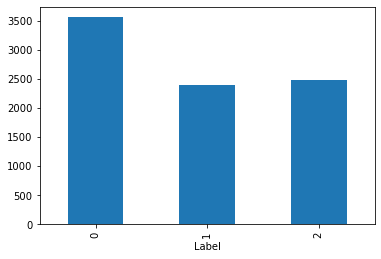

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
df.groupby('Label').Text.count().plot.bar(ylim=0)
plt.show()

In [12]:
# For entire dataset sentences for each labels 
df.Label.value_counts()

0    3555
2    2485
1    2398
Name: Label, dtype: int64

In [13]:
#balancing data 
from collections import Counter
import numpy as np
def balanceClasses(xs, ys):
    item = {}
    new_ys = []
    new_xs = []
    #"""Undersample xs, ys to balance classes."""
    freqs = Counter(ys)
    # the most common class  is the maximum number we want for all classes
    max_allowable = (freqs.most_common()[0][1])
    
    for val in freqs.most_common(): # List
        nums = np.random.randint(1000)
        i = 1
        item[val[0]] = max_allowable - val[1]
        
        if item[val[0]] > 0:            
            while(item[val[0]] - i != 0): 
                nums = nums + 1
                if ys[nums] == val[0]:
                    i += 1
                    new_ys.append(ys[nums])
                    new_xs.append(xs[nums])
    return new_xs, new_ys

In [14]:
new_text, new_label = balanceClasses(df['Text'], df['Label'])

In [15]:
data = pd.DataFrame(new_text)
data.columns = ['Text']
data['Label'] = new_label
data = pd.concat([df, data])

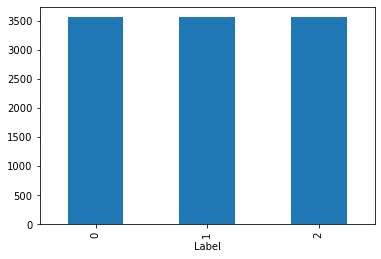

In [16]:
fig1 = plt.figure(figsize=(6,4))
data.groupby('Label').Text.count().plot.bar(ylim=0)
plt.show()

In [17]:
data.Label.value_counts()

0    3555
2    3554
1    3554
Name: Label, dtype: int64

In [18]:
data=data.sample(frac=1).reset_index(drop=True)
data

,Text,Label
0,'@theskindoctor13 Once i ran out playing crick...,0
1,'Left my window open now itâ€™s a cricket in ...,0
2,"""I wish I could be buried in the green coat t...",0
3,'@AatishTaseer I am glad as you are 50% Paki ...,2
4,'@Ilhan Radical Muslim Traitors shouldnâ€™t be...,2
...,...,...
10658,'@MMArslanrajp00t @hend_mana u must learn hist...,1
10659,"""Least I could do is see his body before they ...",0
10660,'@xshriyax Cricket Australia,0
10661,'@Ilhan You married your brother. And your a r...,2


### Data Preprocessing

In [19]:
# People usually join sentences using more than one colon 

def ReplaceDoubleColon(inputString):
    return inputString.replace("..", " ") 

data['Text'] = data['Text'].apply(lambda x: ReplaceDoubleColon(x))

def ReplaceTripleColon(inputString):
    return inputString.replace("...", " ") 

data['Text'] = data['Text'].apply(lambda x: ReplaceTripleColon(x))

def ReplaceFourColon(inputString):
    return inputString.replace("....", " ") 

data['Text'] = data['Text'].apply(lambda x: ReplaceFourColon(x))

In [20]:
def textPattern(text):

    # Clean the text
    text = re.sub(r"@", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", "have", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"doesn't", "does not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"hadn't", "had not", text)
    text = re.sub(r"hasn't", "has not", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"wouldn't", "would not", text)
    text = re.sub(r"mustn't", "must not", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"\'re", "are", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\= =", " ", text)
    text = re.sub(r"\==", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text

data['Text'] = data['Text'].apply(lambda x: textPattern(x))

In [21]:
# Word Tokenization
tokens = [word_tokenize(sen) for sen in data.Text]

In [22]:
# Lower Case
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]

In [23]:
# Remove Link

def removeLink(token):
    word = []
    for w in token:
        if not w.startswith('http'):
            word.append(w)
    return word 
    
removedLink_tokens = [removeLink(token) for token in lower_tokens]

In [24]:
# Word Lemmatization
def lemmatization(token):
    return [lemmatizer.lemmatize(w) for w in token] 

lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [lemmatization(token) for token in removedLink_tokens]

In [25]:
# Removing Stopwords
stoplist = stopwords.words('english')

In [26]:
def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]

filtered_words = [sen for sen in lemmatized_tokens]
data['Text_Final'] = [' '.join(sen) for sen in filtered_words]
data['tokens'] = filtered_words

In [27]:
zero  = []
one = []
two = []
for l in data.Label:
    
    if l == '0':
        zero.append(1)
        one.append(0)
        two.append(0)
    elif l == '1':
        zero.append(0)
        one.append(1)
        two.append(0)
    elif l == '2':
        zero.append(0)
        one.append(0)
        two.append(1)
        
data['0']= zero
data['1']= one
data['2']= two

data = data[['Text_Final', 'tokens', 'Label', '0', '1', '2']]

In [28]:
category_id = []
for l in data.Label:
    
    if l == '0':
        category_id.append('0')
    elif l == '1':
        category_id.append('1')
    elif l == '2':
        category_id.append('2')
        
data['Category_id'] = category_id

data = data[['Text_Final', 'tokens', 'Label', '0', '1', '2', 'Category_id' ]]
data.head(25)

,Text_Final,tokens,Label,0,1,2,Category_id
0,theskindoctor13 once i ran out playing cricket...,"[theskindoctor13, once, i, ran, out, playing, ...",0,1,0,0,0
1,left my window open now itâ€™s a cricket in my...,"[left, my, window, open, now, itâ€™s, a, crick...",0,1,0,0,0
2,`` i wish i could be buried in the green coat ...,"[``, i, wish, i, could, be, buried, in, the, g...",0,1,0,0,0
3,aatishtaseer i am glad a you are 50 % paki and...,"[aatishtaseer, i, am, glad, a, you, are, 50, %...",2,0,0,1,2
4,ilhan radical muslim traitor shouldnâ€™t be in...,"[ilhan, radical, muslim, traitor, shouldnâ€™t,...",2,0,0,1,2
5,firebrand_girl hindu are responsible no one ra...,"[firebrand_girl, hindu, are, responsible, no, ...",2,0,0,1,2
6,happy islamic new year 1 muharram 1442 h,"[happy, islamic, new, year, 1, muharram, 1442, h]",1,0,1,0,1
7,shashitharoor these people have committed bloo...,"[shashitharoor, these, people, have, committed...",2,0,0,1,2
8,will block anyone who say me happy islamic new...,"[will, block, anyone, who, say, me, happy, isl...",1,0,1,0,1
9,cricket___07 raining a bit it no,"[cricket___07, raining, a, bit, it, no]",0,1,0,0,0


In [29]:
data = data[data.tokens != '']

In [32]:
from io import StringIO
category_id_df = data[['Label', 'Category_id']].drop_duplicates().sort_values('Category_id')
category_to_label_dict = dict(category_id_df.values)
label_to_category_dict = dict(category_id_df[['Category_id', 'Label']].values)

#### Split Data into test and train
We will use 90 % data for training and 10 % for testing. We use random state so every time we get the same training and testing data.

# Support Vector Method (SVM) and Random Forest Method (RFM)

We referred a blog on Multi class classification for SVM and RFM [2]

### Generating features using TF-IDF Vectorizer method

In [33]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', encoding='latin-1', ngram_range=(1, 5), stop_words='english')
features = vectorizer.fit_transform(data.Text_Final).toarray()
labels = data.Label
features.shape

(10663, 60923)

### Testing SVM models using K-fold cross validation


In [34]:
import random

# Creating model 
model = LinearSVC(random_state=0, tol=1e-5, verbose=1, max_iter=10000)

# KFold cross-validation
kFold = 10

scores = []
#To get accuracy of the model for 10 different splits
scoreValue = cross_val_score(model, features, labels, scoring='accuracy', cv= kFold)

# append name and score of each model with different splits
print("Support Vector with Tf-idf: ")
for fold_idx, accuracy in enumerate(scoreValue):
    print ((fold_idx + 1), accuracy)
    scores.append(accuracy)
    
Mean_score =  sum(scores) / len(scores)
print(f" Average Accuracy : {Mean_score}" )


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Support Vector with Tf-idf: 
1 0.9784442361761949
2 0.9746954076850984
3 0.9737582005623243
4 0.9643527204502814
5 0.9709193245778611
6 0.975609756097561
7 0.975609756097561
8 0.9690431519699813
9 0.9681050656660413
10 0.9681050656660413
 Average Accuracy : 0.9718642684948946


### Spliting data 90/ 10

In [35]:
# Using similar split as CNN model
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(features, labels, data.index, test_size=0.10, random_state=82)

### SVM - Generating model 

In [36]:
# generate Linear SVM model
model = LinearSVC()
clf = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### SVM - Showing some prediction

In [37]:
# 0
print(clf.predict(vectorizer.transform(["These media fellows have time to dissect one's social media profile,but none of spineless jokers has the guts to question as to why and how a convict like Lalu Yadav is roaming outside and running a Government."])))

['0']


In [38]:
# 2
print(clf.predict(vectorizer.transform(["Muslim asshole jehadi!"])))

['2']


In [39]:
# 1
print(clf.predict(vectorizer.transform(["I have a muslim friend and Islam is beautiful"])))

['1']


In [40]:
# 2
print(clf.predict(vectorizer.transform(["@Peer__Pressure_ @Totla_musa It's a religion of rape. Momo started it and it still continues to this day. Haven't you heard the saying what the right hand possess It's is from Pisslam "])))

['2']


In [41]:
#1
print(clf.predict(vectorizer.transform(["'@hiavol6 happy first day of muharram bub ily"])))

['1']


###  SVM - Displaying false-positive rate (FPR) and true positive rate (TPR)

                          Support Vector Method


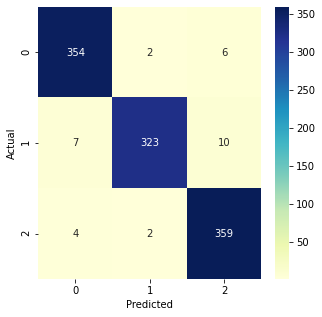

In [42]:
from sklearn.metrics import confusion_matrix
print("                          Support Vector Method")
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap ='YlGnBu',
            xticklabels=category_id_df.Label.values, yticklabels=category_id_df.Label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### SVM - Precision, Recall and F1-Score to quantify the quality of our model using a confusion matrix

In [43]:
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print ('Report : ')
print (classification_report(y_test, y_pred))

Confusion Matrix :
[[354   2   6]
 [  7 323  10]
 [  4   2 359]]
Accuracy Score : 0.9709465791940018
Report : 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       362
           1       0.99      0.95      0.97       340
           2       0.96      0.98      0.97       365

    accuracy                           0.97      1067
   macro avg       0.97      0.97      0.97      1067
weighted avg       0.97      0.97      0.97      1067



# SVM - BOW

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
features1 = count_vect.fit_transform(data.Text_Final).toarray()
labels = data.Label
features1.shape

(10663, 17023)

In [45]:
# Using similar split 90/10
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(features1, labels, data.index, test_size=0.10, random_state=72)

In [46]:
# generate Linear SVM model
#model2 = LinearSVC()
model2 = LinearSVC(random_state=0, tol=1e-5, verbose=1, max_iter=10000)
clf2 = model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

[LibLinear]

### SVM - BOW - Showing some prediction

In [47]:
# 0
print(clf2.predict(count_vect.transform(["Cambs U18 v Under 18 Under 18 138/9 (37.4) Cambridgeshire Cricket Board Under 18 won by 111 runs"])))

['0']


In [48]:
# 2
print(clf2.predict(count_vect.transform(["Muslim asshole jehadi !"])))

['2']


In [49]:
# 1
print(clf2.predict(count_vect.transform(["I have a muslim friend and Islam is beautiful"])))

['1']


In [50]:
# 1
print(clf2.predict(count_vect.transform(["Prophet said: Whenever a Muslim supplicates for his (Muslim) brother in his absence  the angels say: `May the same be for you too"])))

['1']


###  SVM - BOW - Displaying false-positive rate (FPR) and true positive rate (TPR)

                     Support Vector Method - BOW


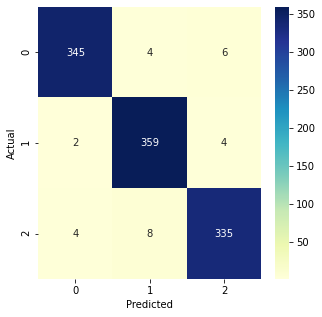

In [51]:
from sklearn.metrics import confusion_matrix
print("                     Support Vector Method - BOW")
conf_mat = confusion_matrix(y_test, y_pred2)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu",
            xticklabels=category_id_df.Label.values, yticklabels=category_id_df.Label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### SVM - BOW - Precision, Recall and F1-Score to quantify the quality of our model using a confusion matrix.

In [52]:
results2 = confusion_matrix(y_test, y_pred2)
print ('Confusion Matrix :')
print(results2) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred2))
print ('Report : ')
print (classification_report(y_test, y_pred2))

Confusion Matrix :
[[345   4   6]
 [  2 359   4]
 [  4   8 335]]
Accuracy Score : 0.9737582005623243
Report : 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       355
           1       0.97      0.98      0.98       365
           2       0.97      0.97      0.97       347

    accuracy                           0.97      1067
   macro avg       0.97      0.97      0.97      1067
weighted avg       0.97      0.97      0.97      1067



### SVM with BOW kfold

In [53]:
# KFold cross-validation
kFold = 10

scores = []
#To get accuracy of the model for 10 different splits
scoreValue = cross_val_score(model2, features1, labels, scoring='accuracy', cv= kFold)

# append name and score of each model with different splits
print("Random Forest with BOW: ")
for fold_idx, accuracy in enumerate(scoreValue):
    print ((fold_idx + 1), accuracy)
    scores.append(accuracy)
    
Mean_score =  sum(scores) / len(scores)
print(f" Average Accuracy : {Mean_score}" )

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Random Forest with BOW: 
1 0.979381443298969
2 0.9803186504217432
3 0.9765698219306467
4 0.9643527204502814
5 0.9727954971857411
6 0.9681050656660413
7 0.9784240150093808
8 0.974671669793621
9 0.9709193245778611
10 0.9793621013133208
 Average Accuracy : 0.9744900309647606


### Reference

[1] Multi-Class Text Classification with Scikit-Learn by Susan Li

[2] Scikit-Learn Documentation https://scikit-learn.org/